# Segmenting Data with k-Means Clustering

## Learning Objectives
The primary objective of clustering is to group items within a dataset based on similarity. **k-Means Clustering** is one of the most popular and easy to use clustering approaches. With k-Means Clustering, similarity is based on a distance metric known as euclidean distance. By the end of this tutorial, you will have learned: 
+ How to import, explore and prepare data for k-Means Clustering
+ How to segment data using k-Means Clustering
+ How to evaluate and visualize clusters
+ How to choose an appropriate number of clusters
+ How to analyze the results of k-Means Clustering

## 1. Collect the Data
Let's import and preview it:

In [1]:
import pandas as pd

In [2]:
customers = pd.read_csv('./data/mallcustomers.csv')
customers.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


## 2. Explore the Data
Next, let's get a concise summary of the structure and the values within the dataset:

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Income,200.0,60560.00,26264.721165,15000.0,41500.00,61500.0,78000.00,137000.0
SpendingScore,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


### Describe with `include=all` parameter

In [8]:
customers.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,200.0,NaN,NaN,NaN,100.5,57.88,1.0,50.75,100.5,150.25,200.0
Gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.97,18.0,28.75,36.0,49.0,70.0
Income,200.0,NaN,NaN,NaN,60560.0,26264.72,15000.0,41500.0,61500.0,78000.0,137000.0
SpendingScore,200.0,NaN,NaN,NaN,50.2,25.82,1.0,34.75,50.0,73.0,99.0


A visual exploration of the dataset can provide us with some additional insight.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

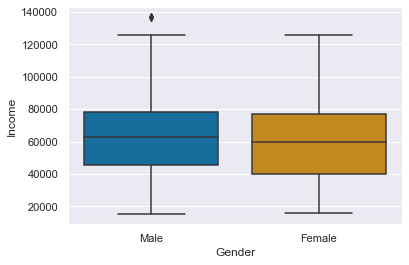

In [11]:
sns.boxplot(data=customers,
           x='Gender',
           y='Income',
           palette='colorblind');

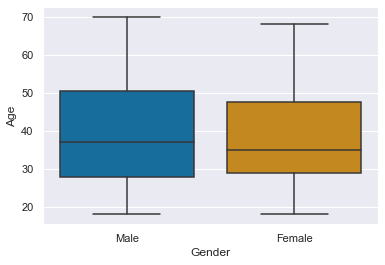

In [12]:
sns.boxplot(data=customers,
           x='Gender',
           y='Age',
           palette='colorblind');

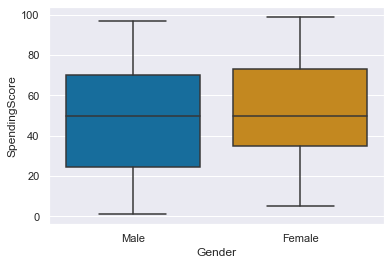

In [14]:
sns.boxplot(data=customers,
           x='Gender',
           y='SpendingScore',
           palette='colorblind');

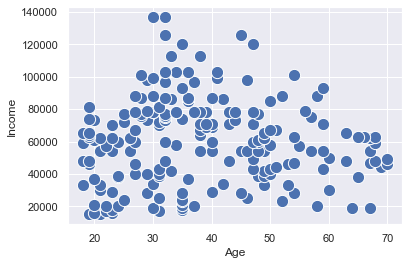

In [18]:
sns.scatterplot(data=customers,
               x='Age',
               y='Income',
               s=150);

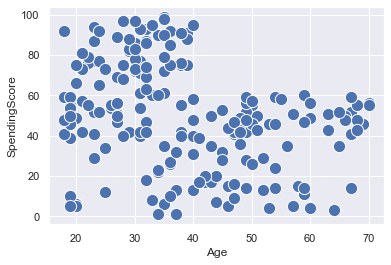

In [19]:
sns.scatterplot(data=customers,
               x='Age',
               y='SpendingScore',
               s=150);

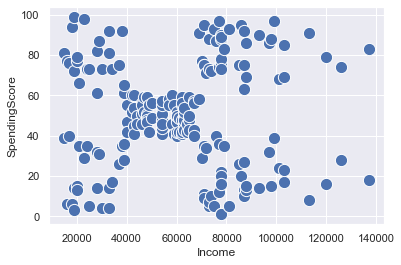

In [20]:
sns.scatterplot(data=customers,
               x='Income',
               y='SpendingScore',
               s=150);

## 3. Prepare the Data

In [22]:
customers[['Income', 'SpendingScore']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Income,200.0,60560.0,26264.72,15000.0,41500.00,61500.0,78000.0,137000.0
SpendingScore,200.0,50.2,25.82,1.0,34.75,50.0,73.0,99.0


**NOTE: If we see the above chart, the std of Income is about 26264.72 and std of SpendingScore is about 25.82. This means data are in different scale. For ML problem like Clustering, we need to make sure data are in same scale.**

**Otherwise, Income feature will dominate over SpendnigScore feature.**

To avoid this, we need to scale our data.

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(customers[['Income', 'SpendingScore']])

In [26]:
customers_scaled = pd.DataFrame(customers_scaled, columns=['Income', 'SpendingScore'])

In [27]:
customers_scaled.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Income,200.0,-0.0,1.0,-2.0,-1.0,0.0,1.0,3.0
SpendingScore,200.0,-0.0,1.0,-2.0,-1.0,-0.0,1.0,2.0


**The approach we have used is called `z-score normalization`. Now we can see that data are in same scale.**

## 3. Create the Clusters

In [29]:
from sklearn.cluster import KMeans

In [30]:
km = KMeans(n_clusters=3, n_init=25, random_state=1234)

In [31]:
km.fit(customers_scaled)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [32]:
# to get cluster assignments
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [34]:
# this is Total Within Cluster Sum of Squares (WCSS) for the cluster
km.inertia_

157.7040081503595

## 4. Evaluate and Visualize the Clusters 

### Evaluation

This is to see if a single cluster is rather large or rather small in comparison to others, it may need further attention

In [37]:
# let's see how many instances are in each clusters
pd.Series(km.labels_).value_counts().sort_index()

0    123
1     38
2     39
dtype: int64

### NOTE:
There are 123 instances in first cluster and 38 instances in 2nd cluster and 39 instances in final cluster.
This means first cluster needs further attention as it is very large compared to other two clusters.

### Cluster Centriods
This also provide info about the clusters.

In [38]:
# let's see the cluster centroids
km.cluster_centers_

array([[-0.62618966, -0.01439238],
       [ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275]])

In [41]:
cluster_centers = pd.DataFrame(km.cluster_centers_,
                              columns=['Income', 'SpendingScore'])

cluster_centers

,Income,SpendingScore
0,-0.626190,-0.014392
1,1.009200,-1.225535
2,0.991583,1.239503


### How to interpret cluster_centers values

+ As we have used `z-score normalization`, x-y coordinates of the average income and spending score will be zero. 
We can interpret that
+ Customers in first cluster cluster have slighly lower than average Income and about average Spending Score.
+ Customers in second cluster have higher than average Income but lower than average Spending Score.
+ Custoemrs in third cluster have higher than average Income and Higher than average Spending Score. 

### Visualize to see the quality of the clusters

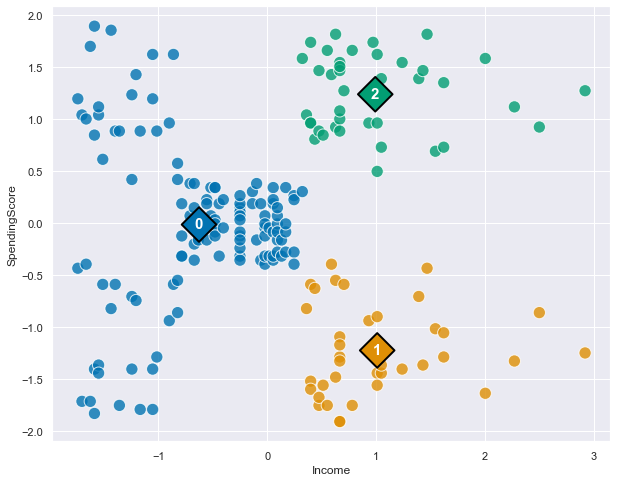

In [51]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i], 
                        y = cluster_centers.SpendingScore[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

## 5. Choose the right number of Clusters

### Approach 1) The Within Cluster Sum of Squares (WCSS)

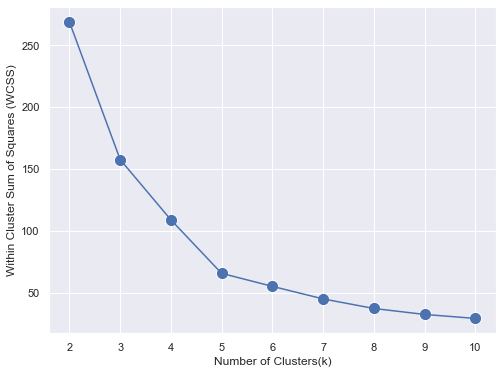

In [56]:
wcss = []

for k in range(2, 11):
    # build the model
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(customers_scaled)
    wcss.append(km.inertia_) #get the wcss value of that particular model
    
# create as panda series
wcss_series = pd.Series(wcss, index=range(2, 11))

# Plot the values
plt.figure(figsize=(8,6))
ax = sns.lineplot(x=wcss_series.index, y=wcss_series)
ax = sns.scatterplot(x=wcss_series.index, y=wcss_series, s=150)

ax = ax.set(xlabel='Number of Clusters(k)',
           ylabel = 'Within Cluster Sum of Squares (WCSS)');

**Based on above chart, we can assume that elbow value is 5.**

Let's see what value we can get from other methods.

### Approach 2) The Average Silhouette Score

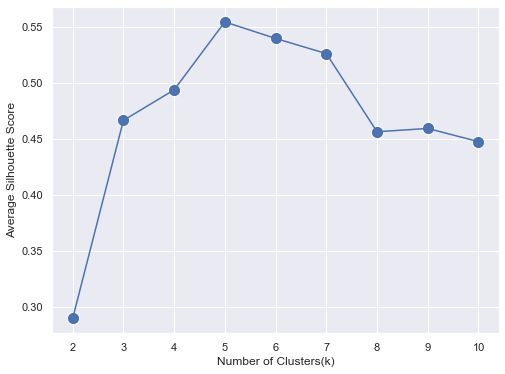

In [59]:
from sklearn.metrics import silhouette_score

silhouette = []

for k in range(2, 11):
    # build the model
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(customers_scaled)
    silhouette_value = silhouette_score(customers_scaled, km.labels_) # get the shilouette score
    silhouette.append(silhouette_value)
    
# create as series
silhouette_series = pd.Series(silhouette, index=range(2, 11))

# Plot the values
plt.figure(figsize=(8,6))
ax = sns.lineplot(x=silhouette_series.index, y=silhouette_series)
ax = sns.scatterplot(x=silhouette_series.index, y=silhouette_series, s=150)

ax = ax.set(xlabel='Number of Clusters(k)',
           ylabel='Average Silhouette Score');

**Based on the chart above, the best value of Silhouette is 5 as the higher the value, the better it is.**

Let's see how the final approach gives what kind of best value.

### Approach 3) The Calinski Harabasz Score

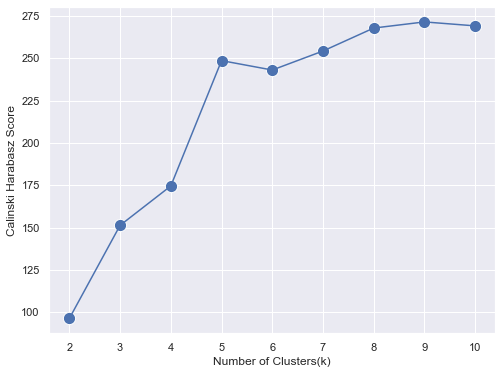

In [62]:
from sklearn.metrics import calinski_harabasz_score

calinski = []

for k in range(2, 11):
    # build the model
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(customers_scaled)
    calinski_value = calinski_harabasz_score(customers_scaled, km.labels_)
    calinski.append(calinski_value)
    
# create into series
calinski_series = pd.Series(calinski, index=range(2, 11))

# Plot the values
plt.figure(figsize=(8, 6))
ax = sns.lineplot(x=calinski_series.index, y=calinski_series)
ax = sns.scatterplot(x=calinski_series.index, y=calinski_series, s=150)

ax = ax.set(xlabel = 'Number of Clusters(k)',
           ylabel='Calinski Harabasz Score');

 **Based on the Calinski-Harabasz score, the optimal value for k is that which corresponds to either the highest score or the first abrupt elbow in the chart.**
 + The highest score is at k equal to 9 where the first abrupt elbow is at k equal to 5. 
 + Considering that the other two approaches suggested k equal to 5, we'll settle on five as the appropriate value for k.

## 6. Analyze and Interpret the Clusters

In [63]:
# we gonna use k=5 for our final model

km = KMeans(n_clusters=5, n_init=25, random_state=1234)
km.fit(customers_scaled)

KMeans(n_clusters=5, n_init=25, random_state=1234)

In [64]:
km.cluster_centers_

array([[-1.30751869, -1.13696536],
       [ 1.05500302, -1.28443907],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [-0.20091257, -0.02645617]])

In [66]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns=['Income', 'SpendingScore'])

cluster_centers

,Income,SpendingScore
0,-1.307519,-1.136965
1,1.055003,-1.284439
2,0.991583,1.239503
3,-1.329545,1.132178
4,-0.200913,-0.026456


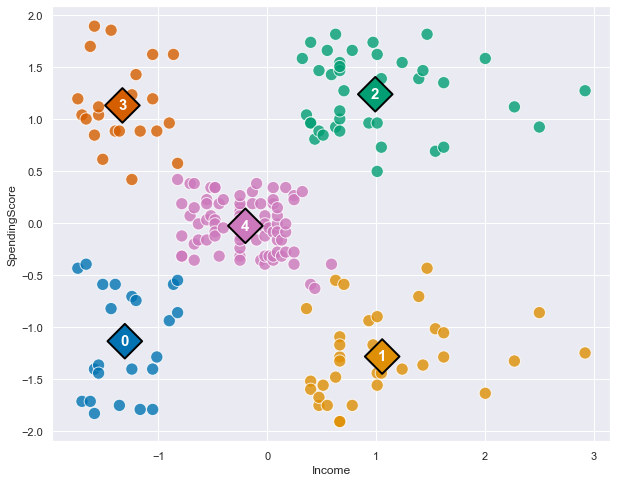

In [73]:
# Plot the value
plt.figure(figsize=(10, 8))

# Plot the clusters
ax = sns.scatterplot(data=customers_scaled,
                    x='Income',
                    y='SpendingScore',
                    hue=km.labels_,
                    palette='colorblind',
                    alpha=0.8,
                    s=150,
                    legend=False)

#Plot the Centroids
ax = sns.scatterplot(data=cluster_centers,
                    x='Income',
                    y='SpendingScore',
                    hue=cluster_centers.index,
                    palette='colorblind',
                    s=600,
                    marker='D',
                    ec='black',
                    legend=False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
    plt.text(x=cluster_centers.Income[i],
                y=cluster_centers.SpendingScore[i],
                s=i,
                horizontalalignment='center',
                verticalalignment='center',
                size=15,
                weight='bold',
                color='white');

In [77]:
# Add Cluster as a new column back to Original Dataset
customers['Cluster'] = km.labels_.tolist()

customers.head()

,CustomerID,Gender,Age,Income,SpendingScore,Cluster
0,1,Male,19,15000,39,0
1,2,Male,21,15000,81,3
2,3,Female,20,16000,6,0
3,4,Female,23,16000,77,3
4,5,Female,31,17000,40,0


In [78]:
customers = pd.get_dummies(customers, columns=['Gender'])
customers.head(10)

,CustomerID,Age,Income,SpendingScore,Cluster,Gender_Female,Gender_Male
0,1,19,15000,39,0,0,1
1,2,21,15000,81,3,0,1
2,3,20,16000,6,0,1,0
3,4,23,16000,77,3,1,0
4,5,31,17000,40,0,1,0
5,6,22,17000,76,3,1,0
6,7,35,18000,6,0,1,0
7,8,23,18000,94,3,1,0
8,9,64,19000,3,0,0,1
9,10,30,19000,72,3,1,0


In [79]:
customers.agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'
}).round(2)

Gender_Female        0.56
Gender_Male          0.44
Age                 36.00
Income           61500.00
SpendingScore       50.00
dtype: float64

We can see that for Gender column based on summary statistics, about 56% are Female and 44% are Male.

In [80]:
customers.groupby('Cluster').agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'
}).round(2)

,Gender_Female,Gender_Male,Age,Income,SpendingScore
Cluster,,,,,
0,0.61,0.39,46.0,25000.0,17.0
1,0.46,0.54,42.0,85000.0,16.0
2,0.54,0.46,32.0,79000.0,83.0
3,0.59,0.41,23.5,24500.0,77.0
4,0.59,0.41,46.0,54000.0,50.0


+ We also see that the median age income and spending score values are 36, $61,500 and 50 respectively. 

**Comparing the descriptive statistics for customers by cluster against the descriptive statistics for all customers provide some interesting insights.**

For example, 
+ we see that the representation of women in clusters zero is higher than the average and the customers in cluster zero tend to be older, earn less and spend less than the average. 
+ The customers in cluster one are more likely to be male, they tend to be older than the average, earn more than the average but spend less than the average customer. 
+ The customers in cluster two mimic the gender distribution of the entire dataset. They are slightly younger than average, but earn and spend more than the average.
+ The gender distribution of customers in cluster three also mimics that of the entire dataset. However, they tend to be much younger and earn less than the average customer. Interestingly, they tend to spend more than the average customer. 
+ Similar to cluster three, the gender distribution of customers in cluster four mimics data the overall dataset. However, they tend to be older than the average, earn a little less than the average, but have an average spending score. 

+ **In terms of a customer relations strategy**, it would make sense to invest in increasing the spending of the high earning low spending customers in cluster one. 
+ Secondly, it would make sense to keep the high earning, high spending customers in cluster two happy. 
+ And thirdly, it would make sense to keep a watchful eye on the low earning high spending customers in cluster three. 